# PARTE I

Datos de AXA del año 2018

## 1 Número de observaciones que tienen coordenadas inválidas

In [1]:
# módulos a usar en este archivo
import pandas as pd             # generación y manipulación de dataframes
import ftfy                     # mejorar el texto por problemas con el encoding
import geopandas as gpd         # creación de mapas
from datetime import datetime   # creación de variables datetime
import seaborn as sns           # creación de scatterplots con línea de regresión

data = pd.read_csv("incidentes_viales_2018_axa.csv", encoding = "latin1")
data.head()

/home/jr2bg/.virtualenvs/cv4py3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0,1,2,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SINIESTRO,LATITUD,LONGITUD,CODIGO POSTAL,CALLE,COLONIA,CAUSA SINIESTRO,TIPO VEHICULO,COLOR,MODELO,...,VOLCADURA,PERDIDA TOTAL,CONDUCTOR DISTRAIDO,FUGA,ALCOHOL,MOTOCICLETA,BICICLETA,SEGURO,TAXI,ANIMAL
0,4379071,16.8529794,-99.9008608,39300,Av. Costera Miguel AlemÃ¡n,Del PanteÃ³n,COLISION Y/O VUELCO,Auto,GRIS,2005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4378995,16.8521022,-99.7969736,39715,MEX 200,Leonardo Rodriguez Alcaine,COLISION Y/O VUELCO,Auto,AZUL CIELO,2009,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,4379228,16.8593584,-99.8437132,39845,Monte Everest MZA 11 LOTE 1,Praderas de Costa Azul,COLISION Y/O VUELCO,Auto,BLANCO,2013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4379138,17.6388618,-101.5504036,40895,Valentina,La Ropa,COLISION Y/O VUELCO,Auto,BLANCO,2011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4379144,0,0,0,AJUSTADOR EN SITIO NOE RAMOS NAVARRETE,Sin dato,COLISION Y/O VUELCO,Auto,ROJO,2012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# renombramos columnas  a usar que tienen errores por el encoding
data.rename(index = str, columns = {"AÃO": "AÑO", "DÃA NUMERO": "DIA NUMERO"}, inplace = True)

`NOTA` En las columnas **LATITUD** y **LONGITUD** no debe haber *Na*, ni *0* 's ni _texto_

In [3]:
# Eliminamos las que tienen LATITUD y LONGITUD vacíos
clean_data = data[data["LATITUD"].notna() | data["LONGITUD"].notna() ]
# Eliminamos los 0'S numéricos
clean_data = clean_data[(clean_data["LATITUD"] != 0 )| (clean_data["LONGITUD"] != 0)]
# Eliminamos los 0's de texto
clean_data = clean_data[(clean_data["LATITUD"] != "0" )| (clean_data["LONGITUD"] != "0")]
#print(clean_data.shape, data.shape)
clean_data = clean_data[~clean_data["LATITUD"].str.contains("[a-zA-Z]", na = False) | 
                        ~clean_data["LONGITUD"].str.contains("[a-zA-Z]", na=False)]
#print(clean_data.shape, data.shape)

# volvemos las columnas a flotantes
clean_data["LATITUD"] = clean_data["LATITUD"].astype("float64")
clean_data["LONGITUD"] = clean_data["LONGITUD"].astype("float64")

# hacemos una resta entre el total de datos inicial y el final para obtener las observaciones inválidas
invalid_obs = data.shape[0] - clean_data.shape[0]
invalid_obs

31329

El número de observaciones con coordenadas inválidas es **31329**.
Además, se hace un tratamiento a las cadenas de texto, pues hubo errores en la lectura por el *encoding* usado.

In [4]:
# tomamos solamente la información que nos interesa
clean_data = clean_data[["ESTADO", "AÑO", "MES", "DIA NUMERO", "HORA", "ALCOHOL","TIPO VEHICULO",
                        "COLOR", "MODELO", "EDAD LESIONADO", "PERDIDA TOTAL", "CODIGO POSTAL", 
                        "CALLE", "LATITUD", "LONGITUD"]]

# Pasamos a uppercase
clean_data["COLOR"] = clean_data["COLOR"].astype(str).map(str.upper)
# mejoramos el encoding y a la par volvemos toda la cadena a MAYÚSCULAS
clean_data["TIPO VEHICULO"] = clean_data["TIPO VEHICULO"].astype(str).map(ftfy.fix_encoding)
clean_data["CALLE"] = clean_data["CALLE"].astype(str).map(ftfy.fix_encoding).map(str.upper)
clean_data["ESTADO"] = clean_data["ESTADO"].map(ftfy.fix_encoding)


In [5]:
# Debemos cambiar, o reemplazar algunos caracteres en ESTADO
clean_data["ESTADO"] = clean_data["ESTADO"].str.replace("Á\x8d", "Í")
clean_data["ESTADO"] = clean_data["ESTADO"].str.replace("Á‰", "É")
clean_data["ESTADO"] = clean_data["ESTADO"].str.replace("Á“N", "ÓN")
clean_data["ESTADO"] = clean_data["ESTADO"].str.replace("Á\x81N", "ÁN")
clean_data["ESTADO"].unique()

array(['GUERRERO', 'AGUASCALIENTES', 'ZACATECAS', 'JALISCO', 'NUEVO LEÓN',
       'CIUDAD DE MÉXICO', 'DURANGO', 'CAMPECHE', 'COAHUILA', 'VERACRUZ',
       'OAXACA', 'CHIHUAHUA', 'MÉXICO', 'SINALOA', 'COLIMA', 'SONORA',
       'QUINTANA ROO', 'MORELOS', 'TLAXCALA', 'TABASCO',
       'BAJA CALIFORNIA', 'NAYARIT', 'MICHOACÁN', 'GUANAJUATO',
       'SAN LUIS POTOSÍ', 'BAJA CALIFORNIA SUR', 'HIDALGO', 'QUERÉTARO',
       'YUCATÁN', 'PUEBLA', 'CHIAPAS', 'TAMAULIPAS'], dtype=object)

## 2 Calcule el total de accidentes por cada estado

In [6]:
# creación de una serie que contenga solo los estados
incPst = clean_data["ESTADO"].value_counts()

# generación de un dataframe con la información buscada
incPst = incPst.to_frame().reset_index()

# renombre de las columnas
incPst.rename(index = str ,columns = {"ESTADO": "INCIDENTES", "index": "ESTADO"}, inplace = True)

incPst

,ESTADO,INCIDENTES
0,CIUDAD DE MÉXICO,56246
1,MÉXICO,33451
2,NUEVO LEÓN,32863
3,JALISCO,31229
4,CHIHUAHUA,19054
5,BAJA CALIFORNIA,18600
6,VERACRUZ,12775
7,SONORA,12390
8,PUEBLA,12334
9,YUCATÁN,10445


## 3 Color y modelo de los 3 tipos de vehículos que más incidentes reporta

In [7]:
# seleccionamos solo COLOR y MODELO del dataframe
df_c_m = clean_data[["COLOR", "MODELO"]]
#print(df_c_m.shape)
df_c_m.head()

,COLOR,MODELO
0,GRIS,2005
1,AZUL CIELO,2009
2,BLANCO,2013
3,BLANCO,2011
5,ANARANJADO,2009


In [8]:
# agrupamos todo en un solo dataframe
df_c_m.groupby(["COLOR", "MODELO"]).size().reset_index(name= 'INCIDENTES')

,COLOR,MODELO,INCIDENTES
0,.,0,1
1,.,2004,1
2,.,2017,2
3,.0..,2007,1
4,0,0,8
5,0,1990,1
6,0,1994,1
7,0,1995,2
8,0,1996,1
9,0,1997,1


La tabla anterior contiene la respuesta al **punto 3**. Cabe resatar que también aparacen colores que son colores erróneos, como *.* o *0*.

## 4 Información sobre los accidentes ocurridos entre las 3 pm del 20 de mayo y las 9 am del 10 de agosto

In [9]:
# Generación de una nueva columna, que almacenará información de una variable tipo datetime
dic_mes = {"ENERO":1, 'FEBRERO':2, 'MARZO':3, 'ABRIL':4, 'MAYO':5, 'JUNIO':6, 'JULIO':7,
       'AGOSTO':8, 'SEPTIEMBRE':9, 'OCTUBRE':10, 'NOVIEMBRE':11, 'DICIEMBRE':12}

# creación de una columna con variable tipo datetime
clean_data["datetime"] = pd.to_datetime({'year':clean_data['AÑO'], 
                                         'month':clean_data["MES"].map(dic_mes), 'day':clean_data['DIA NUMERO'], 
                                         'hour':clean_data["HORA"]})

In [10]:
# fecha de inicio y de término
date_s = datetime(2018,5,20,15)
date_e = datetime(2018,8,10,8)
# selección de las filas a usar considerando solamente las fechas indicadas 
# desde 20 de mayo a las 3pm hasta 10 de agosto a las 8am
data_interval = clean_data[(clean_data["datetime"]>= date_s) & (clean_data["datetime"]<= date_e)]
data_interval.head()

,ESTADO,AÑO,MES,DIA NUMERO,HORA,ALCOHOL,TIPO VEHICULO,COLOR,MODELO,EDAD LESIONADO,PERDIDA TOTAL,CODIGO POSTAL,CALLE,LATITUD,LONGITUD,datetime
122486,GUERRERO,2018,MAYO,21,10,NaN,Auto,GRIS,1950,0,NaN,39095,CAPUFE KM 306 AUTOPISTA ACAPULCO-CHILPANCINGO,17.422807,-99.465696,2018-05-21 10:00:00
122487,GUERRERO,2018,MAYO,21,10,NaN,Auto,GRIS,2010,0,NaN,39550,EJIDO,16.861944,-99.914061,2018-05-21 10:00:00
122488,GUERRERO,2018,MAYO,21,10,NaN,Auto,AMARILLO,1950,0,NaN,39713,CAPUFE AUTOPISTA CUERNAVACA ACAPULCO KM 233,16.923428,-99.810652,2018-05-21 10:00:00
122489,GUERRERO,2018,MAYO,21,13,NaN,Auto,ROJO,1950,0,NaN,39370,CAPUFE ACAPULCO - CHILPANCINGO,16.926420,-99.806126,2018-05-21 13:00:00
122490,GUERRERO,2018,MAYO,21,14,NaN,Camión Ligero,ROJO,2015,0,NaN,39000,BENJAMIN GOMEZ PERALTA,17.549693,-99.489203,2018-05-21 14:00:00


In [11]:
# generación de un df que contenga la información de todos los tipos de vehículo
df_infoPveh = pd.DataFrame({"TIPO VEHICULO": list(clean_data["TIPO VEHICULO"].unique())})
df_infoPveh

,TIPO VEHICULO
0,Auto
1,Camión
2,Motocicleta
3,Camión Ligero
4,\N
5,nan


### a. Edad promedio de los lesionados excluyendo los ceros

In [12]:
# seleccionamos solo los lesionados con edad mayor a cero
# y las columnas TIPO VEHICULO y EDAD LESIONADO
# posteriormente agrupamos por TIPO VEHICULO y calculamos la media 
# por último, generamos el df al hacer reset_index
df_to_app = data_interval[data_interval["EDAD LESIONADO"]> 0][["TIPO VEHICULO", "EDAD LESIONADO"]].groupby(
    ["TIPO VEHICULO"]).agg(["mean"]).reset_index()

# hacemos un merge con el df creado anteriormente
df_infoPveh = pd.merge(df_infoPveh, df_to_app, how="left", left_on = "TIPO VEHICULO", right_on = "TIPO VEHICULO")
# renombre de la columna
df_infoPveh.rename( columns = {('EDAD LESIONADO', 'mean'): "EDAD_PROMEDIO"}, inplace = True)
df_infoPveh.head()

/home/jr2bg/.virtualenvs/cv4py3/lib/python3.6/site-packages/pandas/core/reshape/merge.py:522: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)
/home/jr2bg/.virtualenvs/cv4py3/lib/python3.6/site-packages/pandas/core/generic.py:3812: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


,TIPO VEHICULO,EDAD_PROMEDIO
0,Auto,35.225270
1,Camión,34.108833
2,Motocicleta,32.111111
3,Camión Ligero,34.514658
4,\N,13.000000


### b. Porcentaje que se declaró en pérdida total

In [13]:
# elegimos los que tiene PERDIDA TOTAL con 1
# y seleccionamos TIPO VEHICULO y PERDIDA TOTAL
# agrupamos por TIPO VEHICULO y hacemos su conteo
# por último generamos el df
df_to_app = data_interval[data_interval["PERDIDA TOTAL"] == 1][["TIPO VEHICULO", "PERDIDA TOTAL"]].groupby(
    ["TIPO VEHICULO"]).agg(["count"]).reset_index()

# merge con el df que contendrá la información
df_infoPveh = pd.merge(df_infoPveh, df_to_app, how="left", left_on = "TIPO VEHICULO", right_on = "TIPO VEHICULO")

# cambio del nombre de la columna
df_infoPveh.rename( columns = {('PERDIDA TOTAL', 'count'): "PERDIDA_TOTAL"}, inplace = True)

# llenado del Na con 0's
df_infoPveh["PERDIDA_TOTAL"].fillna(0, inplace = True)
df_infoPveh.head()

,TIPO VEHICULO,EDAD_PROMEDIO,PERDIDA_TOTAL
0,Auto,35.225270,49.0
1,Camión,34.108833,0.0
2,Motocicleta,32.111111,1.0
3,Camión Ligero,34.514658,0.0
4,\N,13.000000,0.0


### c. Número de conductores que estaban bajo efecto del alcohol

In [14]:
# elegimos los que tiene ALCOHOL con 1
# y seleccionamos TIPO VEHICULO y ALCOHOL
# agrupamos por TIPO VEHICULO y hacemos su conteo
# por último generamos el df
df_to_app = data_interval[data_interval["ALCOHOL"] == 1][["TIPO VEHICULO", "ALCOHOL"]].groupby(
    ["TIPO VEHICULO"]).agg(["count"]).reset_index()

# merge con el df que contendrá toda la información
df_infoPveh = pd.merge(df_infoPveh, df_to_app, how="left", left_on = "TIPO VEHICULO", right_on = "TIPO VEHICULO")

# renombrado de los columnas
df_infoPveh.rename( columns = {('ALCOHOL', 'count'): "ALCOHOL"}, inplace = True)

# cambio de los Na a 0
df_infoPveh["ALCOHOL"].fillna(0, inplace = True)
df_infoPveh.head()

,TIPO VEHICULO,EDAD_PROMEDIO,PERDIDA_TOTAL,ALCOHOL
0,Auto,35.225270,49.0,1624.0
1,Camión,34.108833,0.0,1.0
2,Motocicleta,32.111111,1.0,3.0
3,Camión Ligero,34.514658,0.0,2.0
4,\N,13.000000,0.0,0.0


### d. Hora más frecuente a la que ocurrio el accidente

In [15]:
# buscamos la moda
# seleccionamos TIPO VEHICULO y HORA
# agrupamos por TIPO VEHICULO y calculamos la moda
df_to_app = data_interval[["TIPO VEHICULO", "HORA"]].groupby(["TIPO VEHICULO"]).apply(
    pd.DataFrame.mode).reset_index(drop= True)

# merge con el df principal
df_infoPveh = pd.merge(df_infoPveh, df_to_app, how="left", left_on = "TIPO VEHICULO", right_on = "TIPO VEHICULO")
df_infoPveh.head()

,TIPO VEHICULO,EDAD_PROMEDIO,PERDIDA_TOTAL,ALCOHOL,HORA
0,Auto,35.225270,49.0,1624.0,14
1,Camión,34.108833,0.0,1.0,13
2,Motocicleta,32.111111,1.0,3.0,11
3,Camión Ligero,34.514658,0.0,2.0,15
4,\N,13.000000,0.0,0.0,15


### e Top 3 de códigos postales con mayor ocurrencia

In [16]:
# seleccionamos aquellas filas con CODIGO POSTAL diferente a 0
# tomamos solo las columnas TIPO VEHICULO y CODIGO POSTAL
# agrupamos con respecto a ambas para tener un contador
df_vcp = data_interval[data_interval["CODIGO POSTAL"]!= '0'][["TIPO VEHICULO", "CODIGO POSTAL"]].groupby(
    ["TIPO VEHICULO", "CODIGO POSTAL"]).size().reset_index()
df_vcp.head()

,TIPO VEHICULO,CODIGO POSTAL,0
0,Auto,1000,46
1,Auto,10000,7
2,Auto,1001,1
3,Auto,10010,4
4,Auto,10020,1


In [17]:
# ordenamiento descendente con respecto a TIPO VEHICULO y tomamos los 3 primeros valores
df_to_app = df_vcp.sort_values([0], ascending = False).groupby(["TIPO VEHICULO"]).head(3)
df_to_app

,TIPO VEHICULO,CODIGO POSTAL,0
5637,Auto,83000,686
5166,Auto,76800,470
6821,Auto,97000,361
8361,Camión,54750,72
8842,Camión,66600,65
9108,Camión,76800,63
9963,Camión Ligero,31203,29
9991,Camión Ligero,31500,21
9937,Camión Ligero,31000,20
10772,Motocicleta,29030,10


In [18]:
# agrupamos nuevamente con respecto a TIPO VEHICULO
# los distintos valores de CODIGO POSTAL quedan en una lista
df_to_app = df_to_app.groupby(["TIPO VEHICULO"])["CODIGO POSTAL"].apply(list).reset_index()
df_to_app.head()

,TIPO VEHICULO,CODIGO POSTAL
0,Auto,"[83000, 76800, 97000]"
1,Camión,"[54750, 66600, 76800]"
2,Camión Ligero,"[31203, 31500, 31000]"
3,Motocicleta,"[29030, 29000, 62515]"
4,\N,"[76800, 64590, 62520]"


In [19]:
# merge con el df principal
df_infoPveh = pd.merge(df_infoPveh, df_to_app, how="left", left_on = "TIPO VEHICULO", right_on = "TIPO VEHICULO")

#df_infoPveh.pop("CODIGO POSTAL")
df_infoPveh.head()

,TIPO VEHICULO,EDAD_PROMEDIO,PERDIDA_TOTAL,ALCOHOL,HORA,CODIGO POSTAL
0,Auto,35.225270,49.0,1624.0,14,"[83000, 76800, 97000]"
1,Camión,34.108833,0.0,1.0,13,"[54750, 66600, 76800]"
2,Motocicleta,32.111111,1.0,3.0,11,"[29030, 29000, 62515]"
3,Camión Ligero,34.514658,0.0,2.0,15,"[31203, 31500, 31000]"
4,\N,13.000000,0.0,0.0,15,"[76800, 64590, 62520]"


In [20]:
df_infoPveh

,TIPO VEHICULO,EDAD_PROMEDIO,PERDIDA_TOTAL,ALCOHOL,HORA,CODIGO POSTAL
0,Auto,35.225270,49.0,1624.0,14,"[83000, 76800, 97000]"
1,Camión,34.108833,0.0,1.0,13,"[54750, 66600, 76800]"
2,Motocicleta,32.111111,1.0,3.0,11,"[29030, 29000, 62515]"
3,Camión Ligero,34.514658,0.0,2.0,15,"[31203, 31500, 31000]"
4,\N,13.000000,0.0,0.0,15,"[76800, 64590, 62520]"
5,nan,32.000000,0.0,0.0,20,"[76800, 22320, 64590]"


## 5 Número de incidentes por cada semana del año

In [21]:
# generacion del número de semana
clean_data["NUM_SEMANA"] = clean_data["datetime"].dt.week

# investigando valores únicos
clean_data["NUM_SEMANA"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])

In [22]:
#agrupacion por num semana
df_incPw = clean_data[clean_data["NUM_SEMANA"] <= 52].groupby(["NUM_SEMANA"]).size().reset_index()
df_incPw.rename(columns = {0:"NUM_INCIDENTES"}, inplace = True)
df_incPw.head()

,NUM_SEMANA,NUM_INCIDENTES
0,1,4816
1,2,6630
2,3,6533
3,4,6581
4,5,6477


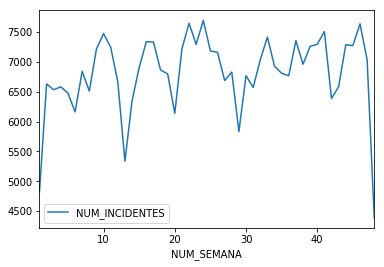

In [23]:
%matplotlib inline
# generación de la gráfica
df_incPw.plot(x = "NUM_SEMANA", y = "NUM_INCIDENTES")

## 6 mapa

In [24]:
# creación del DF a usar en el mapa
# tomamos aquellos que contienen AUTOPISTA o AUT en CALLE, pasamos CALLE previamente a MAYÚSCULAS
# seleccionamos solo las columnas TIPO VEHICULO, LATITUD y LONGITUD
df_map = clean_data[clean_data["CALLE"].str.contains("AUTOPISTA") | 
                    clean_data["CALLE"].str.contains("AUT")][["TIPO VEHICULO","LATITUD","LONGITUD"]]
df_map.head()

,TIPO VEHICULO,LATITUD,LONGITUD
15,Auto,17.423807,-99.466832
49,Auto,16.863965,-99.881248
126,Auto,17.423940,-99.466832
130,Auto,16.884286,-99.842099
196,Auto,16.997109,-99.696780


In [25]:
# generación de los puntos en el mapa usando geopandas
gdf = gpd.GeoDataFrame(
    df_map, geometry=gpd.points_from_xy(df_map["LONGITUD"], df_map["LATITUD"]))
gdf.head()

,TIPO VEHICULO,LATITUD,LONGITUD,geometry
15,Auto,17.423807,-99.466832,POINT (-99.46683179999999 17.4238066)
49,Auto,16.863965,-99.881248,POINT (-99.881248 16.8639646)
126,Auto,17.423940,-99.466832,POINT (-99.46683179999999 17.4239397)
130,Auto,16.884286,-99.842099,POINT (-99.8420988 16.8842859)
196,Auto,16.997109,-99.696780,POINT (-99.69678 16.9971086)


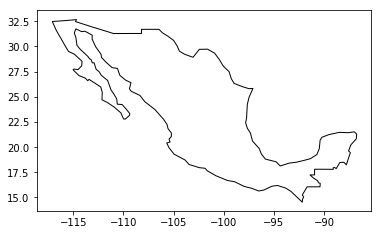

In [26]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


# México
ax = world[world.name == 'Mexico'].plot(
    color='white', edgecolor='black')

#plt.show()

El mapa de México abarca longitud desde alrededor -120 a -85 y latitud de 15 a 32.5 aprox

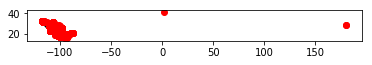

In [27]:
# México
ax = world[world.name == 'Mexico'].plot(
    color='white', edgecolor='black')
# anexamos los puntos
gdf["geometry"].plot(ax=ax, color='red')

En el mapa anterior, tenemos puntos que están fuera. Entonces debemos limpiar la información del gdf

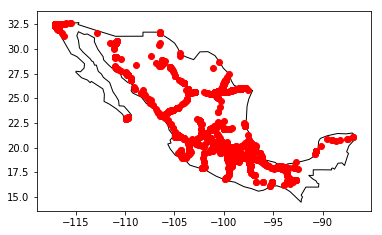

In [28]:
gdf = gdf[gdf["LONGITUD"]<-50 ]

# México
ax = world[world.name == 'Mexico'].plot(
    color='white', edgecolor='black')
# anexamos los puntos
gdf["geometry"].plot(ax=ax, color='red')


Ahora, generaremos los df para los distintos tipos de vehículo: Auto, Camión, Motocicleta y Camión Ligero

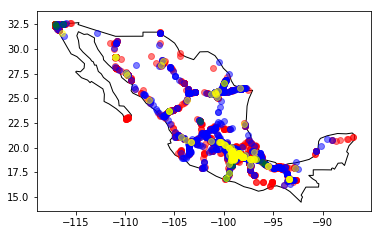

In [29]:
#Auto
df_map_tv = df_map[(df_map["LONGITUD"] <-50) & (df_map["TIPO VEHICULO"] == "Auto")]

gdf_tv = gpd.GeoDataFrame(
    df_map_tv, geometry=gpd.points_from_xy(df_map_tv["LONGITUD"], df_map_tv["LATITUD"]))

# México
ax = world[world.name == 'Mexico'].plot(
    color='white', edgecolor='black')

# anexamos los puntos
gdf_tv.plot(ax=ax, color='red', alpha = 0.5)



# Camión
df_map_tv = df_map[df_map["TIPO VEHICULO"] == "Camión"]

gdf_tv = gpd.GeoDataFrame(
    df_map_tv, geometry=gpd.points_from_xy(df_map_tv["LONGITUD"], df_map_tv["LATITUD"]))
# anexamos los puntos
gdf_tv.plot(ax=ax, color='blue', alpha = 0.5)


# Motocicleta
df_map_tv = df_map[df_map["TIPO VEHICULO"] == "Motocicleta"]

gdf_tv = gpd.GeoDataFrame(
    df_map_tv, geometry=gpd.points_from_xy(df_map_tv["LONGITUD"], df_map_tv["LATITUD"]))
# anexamos los puntos
gdf_tv.plot(ax=ax, color='green', alpha = 0.5)


# Camión Ligero
df_map_tv = df_map[df_map["TIPO VEHICULO"] == "Camión Ligero"]

gdf_tv = gpd.GeoDataFrame(
    df_map_tv, geometry=gpd.points_from_xy(df_map_tv["LONGITUD"], df_map_tv["LATITUD"]))
# anexamos los puntos
gdf_tv.plot(ax=ax, color='yellow', alpha = 0.5)

En el mapa anterior, los puntos color **rojo** corresponden a los *Auto*, los color **azul** a *Camión*, los color **verde** a *Motocicleta* y, por último, los color **amarillo** a *Camión Ligero*

# PARTE II

Los archivos se encuentran dentro de la carpeta *data_part_ii*. (Se envía como un archivo .zip.)

## 1

In [30]:
import xlrd
import os
import re

# función que tiene como ingreso una dirección y devuelve un dataframe con la información en formato tidy
def extract_info_xl(xl_path):
    # patrón a matchear para extraer la entidad
    patt = "2013>\s[a-zA-Záéíóú\s]+>\sTotal de la actividad"
    
    # lectura del doc de escel
    wb = xlrd.open_workbook(xl_path)
    sheet = wb.sheet_by_name("Serie completa")
    str_entidad = sheet.cell(1,1).value

    # busqueda y extracción de "entidad"
    entidad = re.search(patt, str_entidad).group()
    entidad = entidad[6:-23]
    entidad = [entidad for x in range(2003,2018)]
    
    # extracción del año y pib usando list comprehension
    year = [sheet.cell(i,0).value for i in range(11,26)]
    pib = [sheet.cell(i,1).value for i in range(11,26)]
    
    return pd.DataFrame({"ENTIDAD":entidad, "AÑO":year, "pib":pib})
    
    
def yearly_state_pib():
    # inicialización del dataframe
    df = pd.DataFrame(columns=["ENTIDAD", "AÑO", "pib"])
    
    # lista con todos los archivos excel
    list_files = [x for x in os.listdir("data_part_ii") if x.endswith(".xls")]
    # ciclo para todos los archivos de excel
    for file in list_files:
        # append de la información al df principal 
        df = df.append(extract_info_xl(os.path.join("data_part_ii",file)), ignore_index= True)
    
    return df



In [31]:
# creación del df
df = yearly_state_pib()
df.head()

,ENTIDAD,AÑO,pib
0,Sinaloa,2003.0,268247.066
1,Sinaloa,2004.0,284658.629
2,Sinaloa,2005.0,285708.482
3,Sinaloa,2006.0,294951.695
4,Sinaloa,2007.0,305622.537


## 2

In [32]:
# función para limpiar los datos de la población
def f_clean_data_pop(path_data):
    
    df = pd.read_csv(path_data, encoding = "latin3")
    # seleccionamos solo los datos entre 2003 y 2017
    df_bool_yrs = (df["CVE_GEO"] > 0) & (df["AÑO"] >= 2003) & (df["AÑO"] <= 2017)
    # consideramos solo AÑO, ENTIDAD y POBLACION
    df = df[df_bool_yrs][["AÑO", "ENTIDAD", "POBLACION"]].reset_index(drop = True)
    
    return df

In [33]:
# generación del df
df_pop = f_clean_data_pop(os.path.join("data_part_ii","pob_mit_proyecciones.csv"))
df_pop.head()

,AÑO,ENTIDAD,POBLACION
0,2003,Aguascalientes,12773
1,2003,Aguascalientes,12300
2,2003,Aguascalientes,12760
3,2003,Aguascalientes,12304
4,2003,Aguascalientes,12739


## 3

In [34]:
# merge de los dos df anteriores para calcular el pib per cápita
df_ypc = pd.merge(df, df_pop, left_on = ["ENTIDAD", "AÑO"], right_on = ["ENTIDAD", "AÑO"], how = "left")
# calculo del pib per capita
df_ypc["pib_pc"] = df_ypc["pib"] / df_ypc["POBLACION"]
# eliminación de las columnas que no se usarán
df_ypc.pop("POBLACION")
df_ypc.pop("pib")

df_ypc.head()

,ENTIDAD,AÑO,pib_pc
0,Sinaloa,2003.0,9.558064
1,Sinaloa,2003.0,9.901704
2,Sinaloa,2003.0,9.510284
3,Sinaloa,2003.0,9.851521
4,Sinaloa,2003.0,9.456641


## 4

In [35]:
# generación de un df con el conteo del número de incidentes por estado
df_scp = clean_data.groupby(["ESTADO"]).size().reset_index()
df_scp.rename(columns = {0:"NUM_INCIDENTES"}, inplace = True)
df_scp

,ESTADO,NUM_INCIDENTES
0,AGUASCALIENTES,2682
1,BAJA CALIFORNIA,18600
2,BAJA CALIFORNIA SUR,1460
3,CAMPECHE,1989
4,CHIAPAS,2934
5,CHIHUAHUA,19054
6,CIUDAD DE MÉXICO,56246
7,COAHUILA,7345
8,COLIMA,1230
9,DURANGO,4392


In [36]:
# reemplazo de cadenas de estado para que ambos df contengan la información igual
df["ENTIDAD"].replace("Coahuila de Zaragoza", "COAHUILA", inplace = True)
df["ENTIDAD"].replace("Michoacán de Ocampo", "MICHOACÁN", inplace = True)
df["ENTIDAD"].replace("Veracruz de Ignacio de la Llave", "VERACRUZ", inplace = True)
df["ENTIDAD"] = df["ENTIDAD"].astype(str).map(str.upper)

# merge para tener NUM_INCIDENTES y pib en un df
df_scp = pd.merge(df_scp, df[df["AÑO"] == 2017][["ENTIDAD", "pib"]],how = "left", left_on = "ESTADO", right_on = "ENTIDAD")

df_scp

,ESTADO,NUM_INCIDENTES,ENTIDAD,pib
0,AGUASCALIENTES,2682,AGUASCALIENTES,224375.777
1,BAJA CALIFORNIA,18600,BAJA CALIFORNIA,544644.718
2,BAJA CALIFORNIA SUR,1460,BAJA CALIFORNIA SUR,149572.636
3,CAMPECHE,1989,CAMPECHE,538379.690
4,CHIAPAS,2934,CHIAPAS,281832.641
5,CHIHUAHUA,19054,CHIHUAHUA,556562.981
6,CIUDAD DE MÉXICO,56246,CIUDAD DE MÉXICO,3044809.002
7,COAHUILA,7345,COAHUILA,612676.302
8,COLIMA,1230,COLIMA,105770.998
9,DURANGO,4392,DURANGO,200309.292


In [37]:
# eliminación de las columnas que no se usarán
df_scp.pop("ENTIDAD")
df_scp.pop("ESTADO")
df_scp

,NUM_INCIDENTES,pib
0,2682,224375.777
1,18600,544644.718
2,1460,149572.636
3,1989,538379.690
4,2934,281832.641
5,19054,556562.981
6,56246,3044809.002
7,7345,612676.302
8,1230,105770.998
9,4392,200309.292


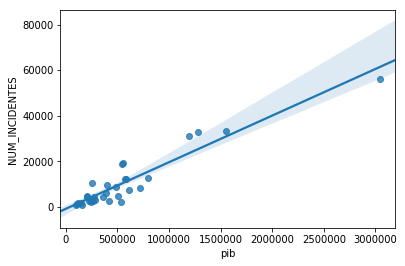

In [38]:
#ax_2 = df_scp.plot.scatter(x = "pib", y = "NUM_INCIDENTES", c= "blue", alpha = 0.5)
# uso de seaborn para generar un gráfico scatter con una línea de regresión
sns.regplot(x='pib', y='NUM_INCIDENTES', data=df_scp)